## Collect all tweets from @realDonaldTrump

In [1]:
import sys
sys.path.append('..')

from twords.twords import Twords 
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
# this pandas line makes the dataframe display all text in a line; useful for seeing entire tweets
pd.set_option('display.max_colwidth', -1)

In [2]:
twit = Twords()
# set path to folder that contains jar files for twitter search
twit.jar_folder_path = "../jar_files_and_background/"

In [ ]:
twit.get_all_user_tweets("realdonaldtrump", tweets_per_run=500)

In [3]:
twit.data_path = "realdonaldtrump"
twit.get_java_tweets_from_csv_list()
twit.convert_tweet_dates_to_standard()

To sort tweets by favorites or retweets, need to convert unicode to integers: 

In [4]:
twit.tweets_df["retweets"] = twit.tweets_df["retweets"].map(int)
twit.tweets_df["favorites"] = twit.tweets_df["favorites"].map(int)

In [5]:
twit.tweets_df.sort_values("favorites", ascending=False)[:5]

,username,date,retweets,favorites,text,mentions,hashtags,id,permalink
646,NaN,2016-11-09,220127,631966,Such a beautiful and important evening! The forgotten man and woman will never be forgotten again. We will all come together as never before,NaN,NaN,796315640307060738,https://twitter.com/realDonaldTrump/status/796315640307060738
655,NaN,2016-11-08,343803,572895,TODAY WE MAKE AMERICA GREAT AGAIN!,NaN,NaN,795954831718498305,https://twitter.com/realDonaldTrump/status/795954831718498305
5269,NaN,2017-01-22,83011,395256,"Peaceful protests are a hallmark of our democracy. Even if I don't always agree, I recognize the rights of people to express their views.",NaN,NaN,823174199036542980,https://twitter.com/realDonaldTrump/status/823174199036542980
5420,NaN,2016-12-31,141348,350024,"Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don't know what to do. Love!",NaN,NaN,815185071317676033,https://twitter.com/realDonaldTrump/status/815185071317676033
26258,NaN,2016-06-09,164654,292420,"How long did it take your staff of 823 people to think that up--and where are your 33,000 emails that you deleted?https://twitter.com/hillaryclinton/status/740973710593654784 …",NaN,NaN,741007091947556864,https://twitter.com/realDonaldTrump/status/741007091947556864


In [6]:
twit.tweets_df.sort_values("retweets", ascending=False)[:5]

,username,date,retweets,favorites,text,mentions,hashtags,id,permalink
655,NaN,2016-11-08,343803,572895,TODAY WE MAKE AMERICA GREAT AGAIN!,NaN,NaN,795954831718498305,https://twitter.com/realDonaldTrump/status/795954831718498305
646,NaN,2016-11-09,220127,631966,Such a beautiful and important evening! The forgotten man and woman will never be forgotten again. We will all come together as never before,NaN,NaN,796315640307060738,https://twitter.com/realDonaldTrump/status/796315640307060738
5564,NaN,2014-06-04,177139,146366,Are you allowed to impeach a president for gross incompetence?,NaN,NaN,474134260149157888,https://twitter.com/realDonaldTrump/status/474134260149157888
26258,NaN,2016-06-09,164654,292420,"How long did it take your staff of 823 people to think that up--and where are your 33,000 emails that you deleted?https://twitter.com/hillaryclinton/status/740973710593654784 …",NaN,NaN,741007091947556864,https://twitter.com/realDonaldTrump/status/741007091947556864
15021,NaN,2012-11-06,157029,113686,The electoral college is a disaster for a democracy.,NaN,NaN,266038556504494082,https://twitter.com/realDonaldTrump/status/266038556504494082


For some reason the search did not include Trump's username - random errors like this sometimes happen when querying the twitter website.

## Look at word frequencies

In [7]:
twit.background_path = '../jar_files_and_background/freq_table_72319443_total_words_twitter_corpus.csv'
twit.create_Background_dict()
twit.create_Stop_words()

In [8]:
twit.keep_column_of_original_tweets()
twit.lower_tweets()
twit.keep_only_unicode_tweet_text()
twit.remove_urls_from_tweets()
twit.remove_punctuation_from_tweets()
twit.drop_non_ascii_characters_from_tweets()
twit.drop_duplicate_tweets()
twit.convert_tweet_dates_to_standard()
twit.sort_tweets_by_date()

Removing urls from tweets...
This may take a minute - cleaning rate is about 400,000 tweets per minute
Time to complete: 0.074 minutes
Tweets cleaned per minute: 429781.7


Make word frequency dataframe:

In [9]:
twit.create_word_bag()
twit.make_nltk_object_from_word_bag()
twit.create_word_freq_df(10000)

Time to make words_string:  0.0 minutes
Time to tokenize:  0.049 minutes
Time to compute word bag:  0.04 minutes
Creating word_freq_df...
Takes about 1 minute per 1000 words
Time to create word_freq_df:  4.4209 minutes


In [10]:
twit.word_freq_df.sort_values("log relative frequency", ascending = False, inplace = True)
twit.word_freq_df.head(20)

,word,occurrences,frequency,relative frequency,log relative frequency,background occurrences
594,turnberry,82,0.000270,1955.772084,7.578540,10
951,cpac,53,0.000175,1264.096591,7.142113,10
628,trumpforpresident,77,0.000254,1147.823556,7.045623,16
767,melaniatrump,65,0.000214,1107.362243,7.009736,14
259,doral,167,0.000551,1048.183370,6.954814,38
1587,traceadkins,30,0.000099,894.407965,6.796162,8
1767,bedminster,26,0.000086,775.153570,6.653061,8
512,alexsalmond,93,0.000307,764.873019,6.639710,29
711,karlrove,69,0.000228,748.050298,6.617470,22
807,squawkcnbc,62,0.000204,704.168811,6.557018,21


### Look at most and least Trump-like tweets at varying levels of background requirement

### At least 100 background occurrences: 

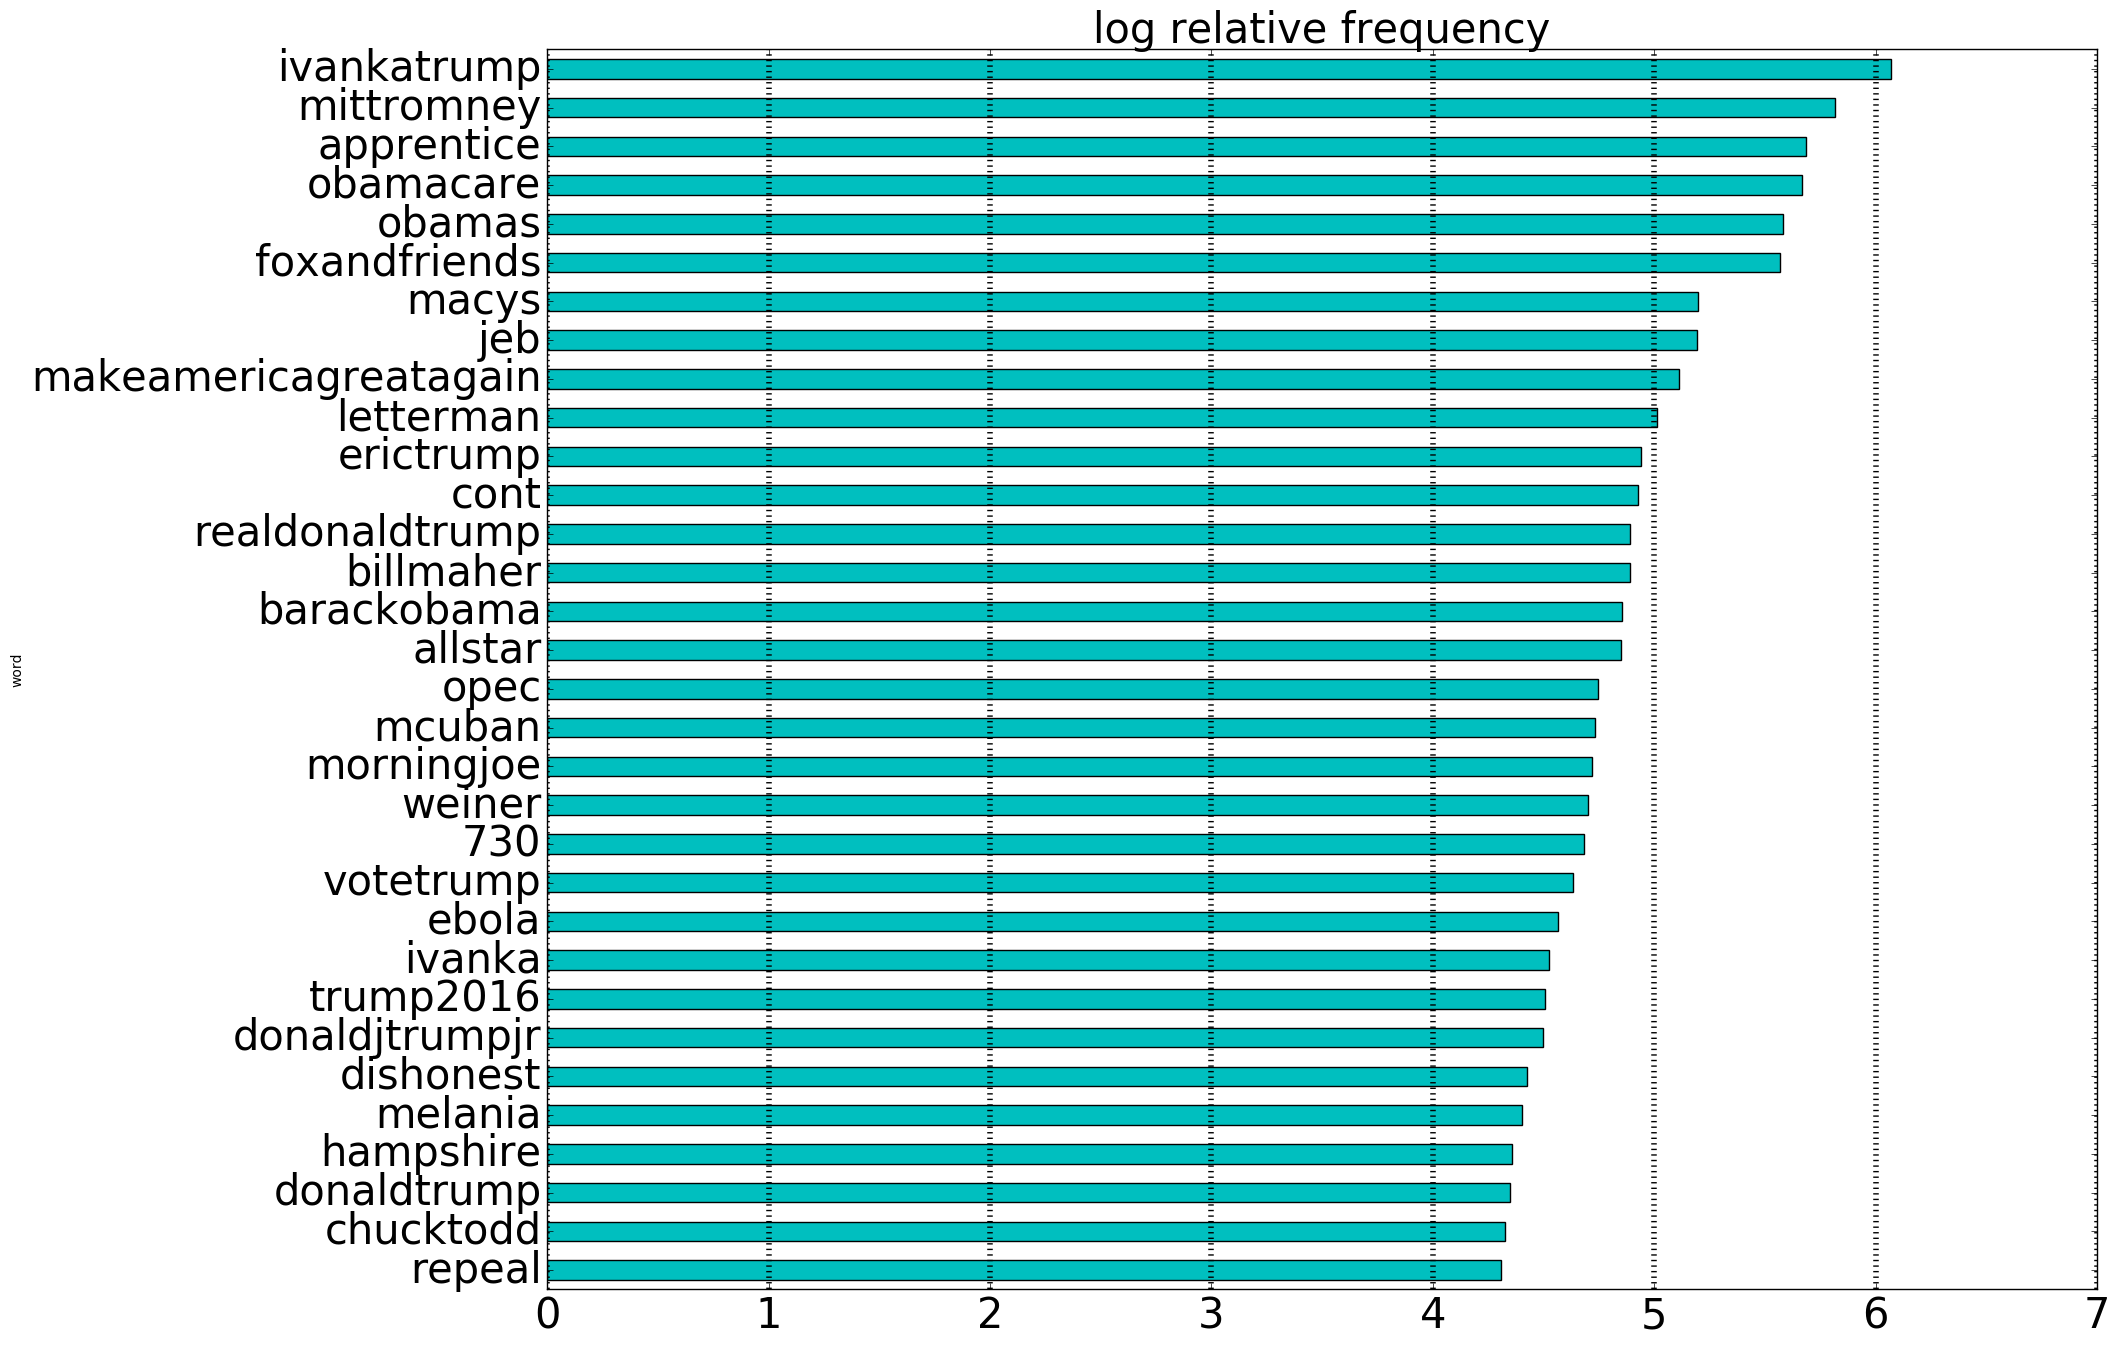

In [11]:
num_words_to_plot = 32
background_cutoff = 100
twit.word_freq_df[twit.word_freq_df['background occurrences']>background_cutoff].sort_values("log relative frequency", ascending=True).set_index("word")["log relative frequency"][-num_words_to_plot:].plot.barh(figsize=(20,
                num_words_to_plot/2.), fontsize=30, color="c"); 
plt.title("log relative frequency", fontsize=30); 
ax = plt.axes();        
ax.xaxis.grid(linewidth=4);

### At least 1000 background occurrences: 

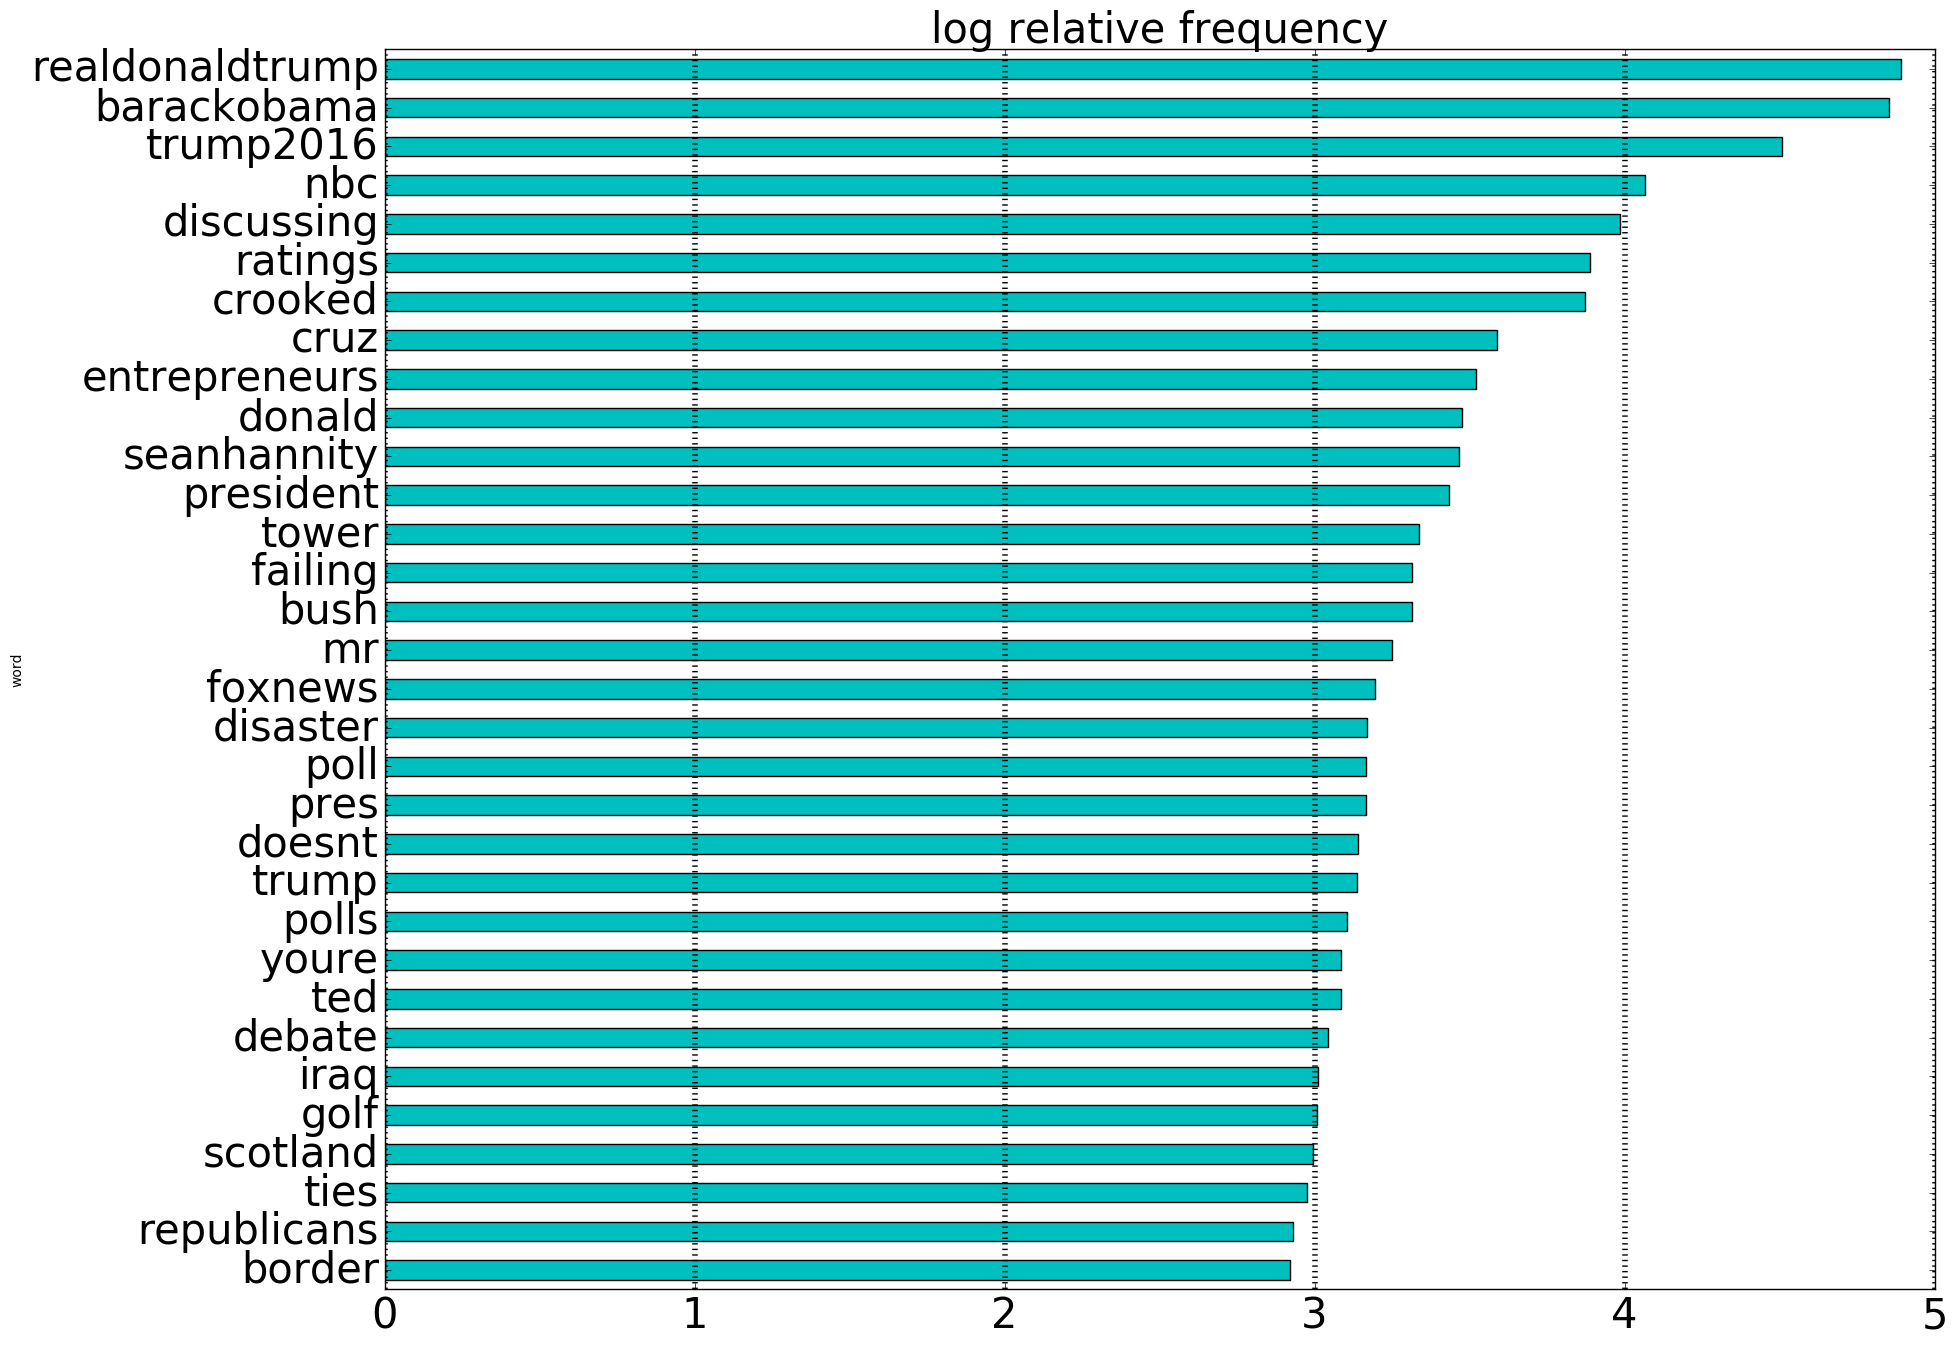

In [12]:
num_words_to_plot = 32
background_cutoff = 1000
twit.word_freq_df[twit.word_freq_df['background occurrences']>background_cutoff].sort_values("log relative frequency", ascending=True).set_index("word")["log relative frequency"][-num_words_to_plot:].plot.barh(figsize=(20,
                num_words_to_plot/2.), fontsize=30, color="c"); 
plt.title("log relative frequency", fontsize=30); 
ax = plt.axes();        
ax.xaxis.grid(linewidth=4);

### At least 10,000 background occurrences: 

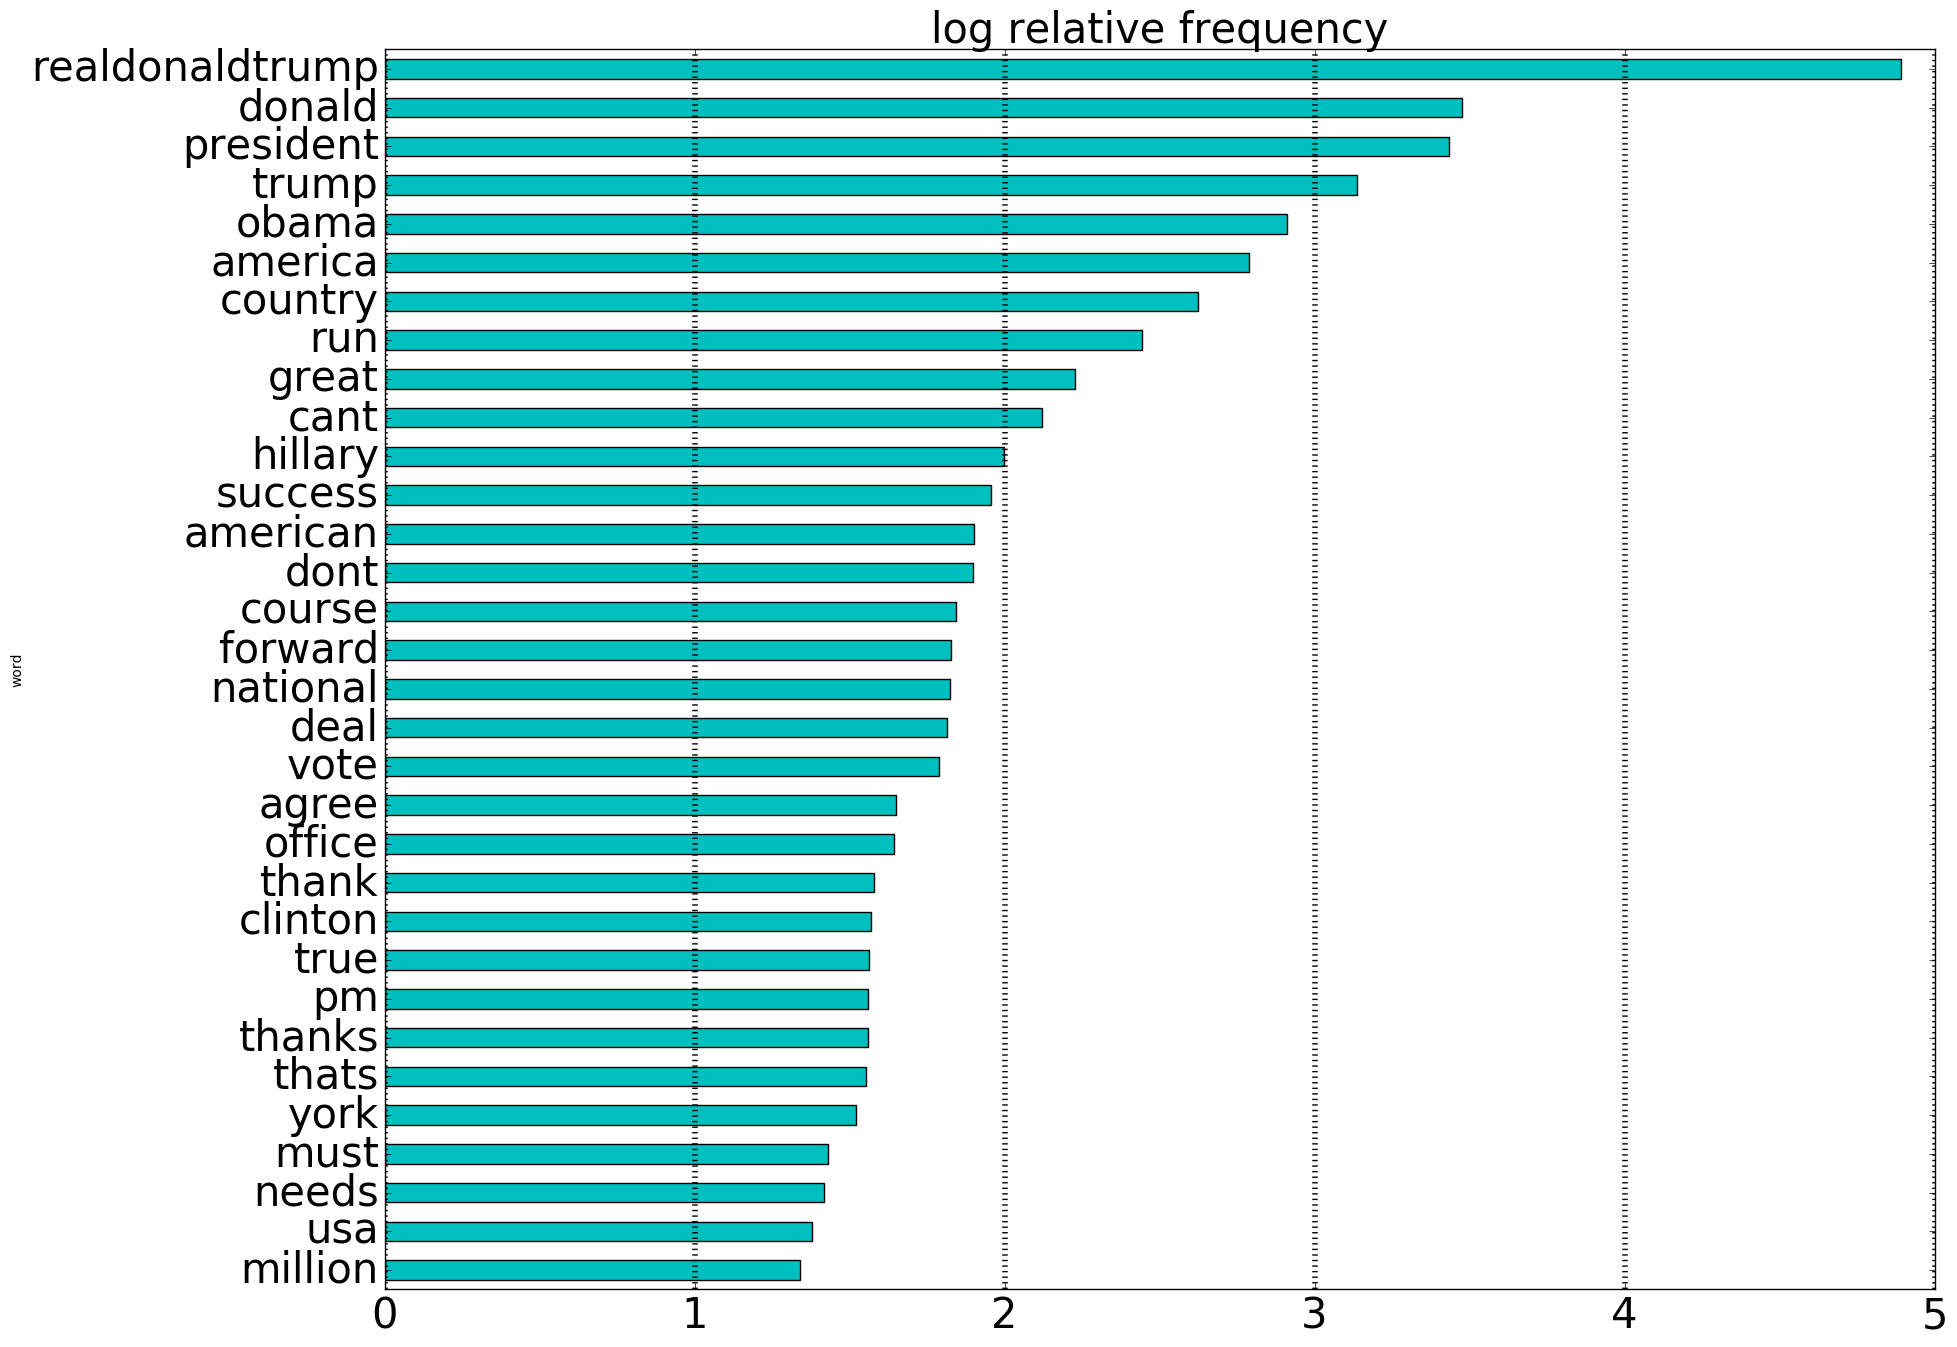

In [13]:
num_words_to_plot = 32
background_cutoff = 10000
twit.word_freq_df[twit.word_freq_df['background occurrences']>background_cutoff].sort_values("log relative frequency", ascending=True).set_index("word")["log relative frequency"][-num_words_to_plot:].plot.barh(figsize=(20,
                num_words_to_plot/2.), fontsize=30, color="c"); 
plt.title("log relative frequency", fontsize=30); 
ax = plt.axes();        
ax.xaxis.grid(linewidth=4);

## And now look at least Trump-like relative to Twitter background:

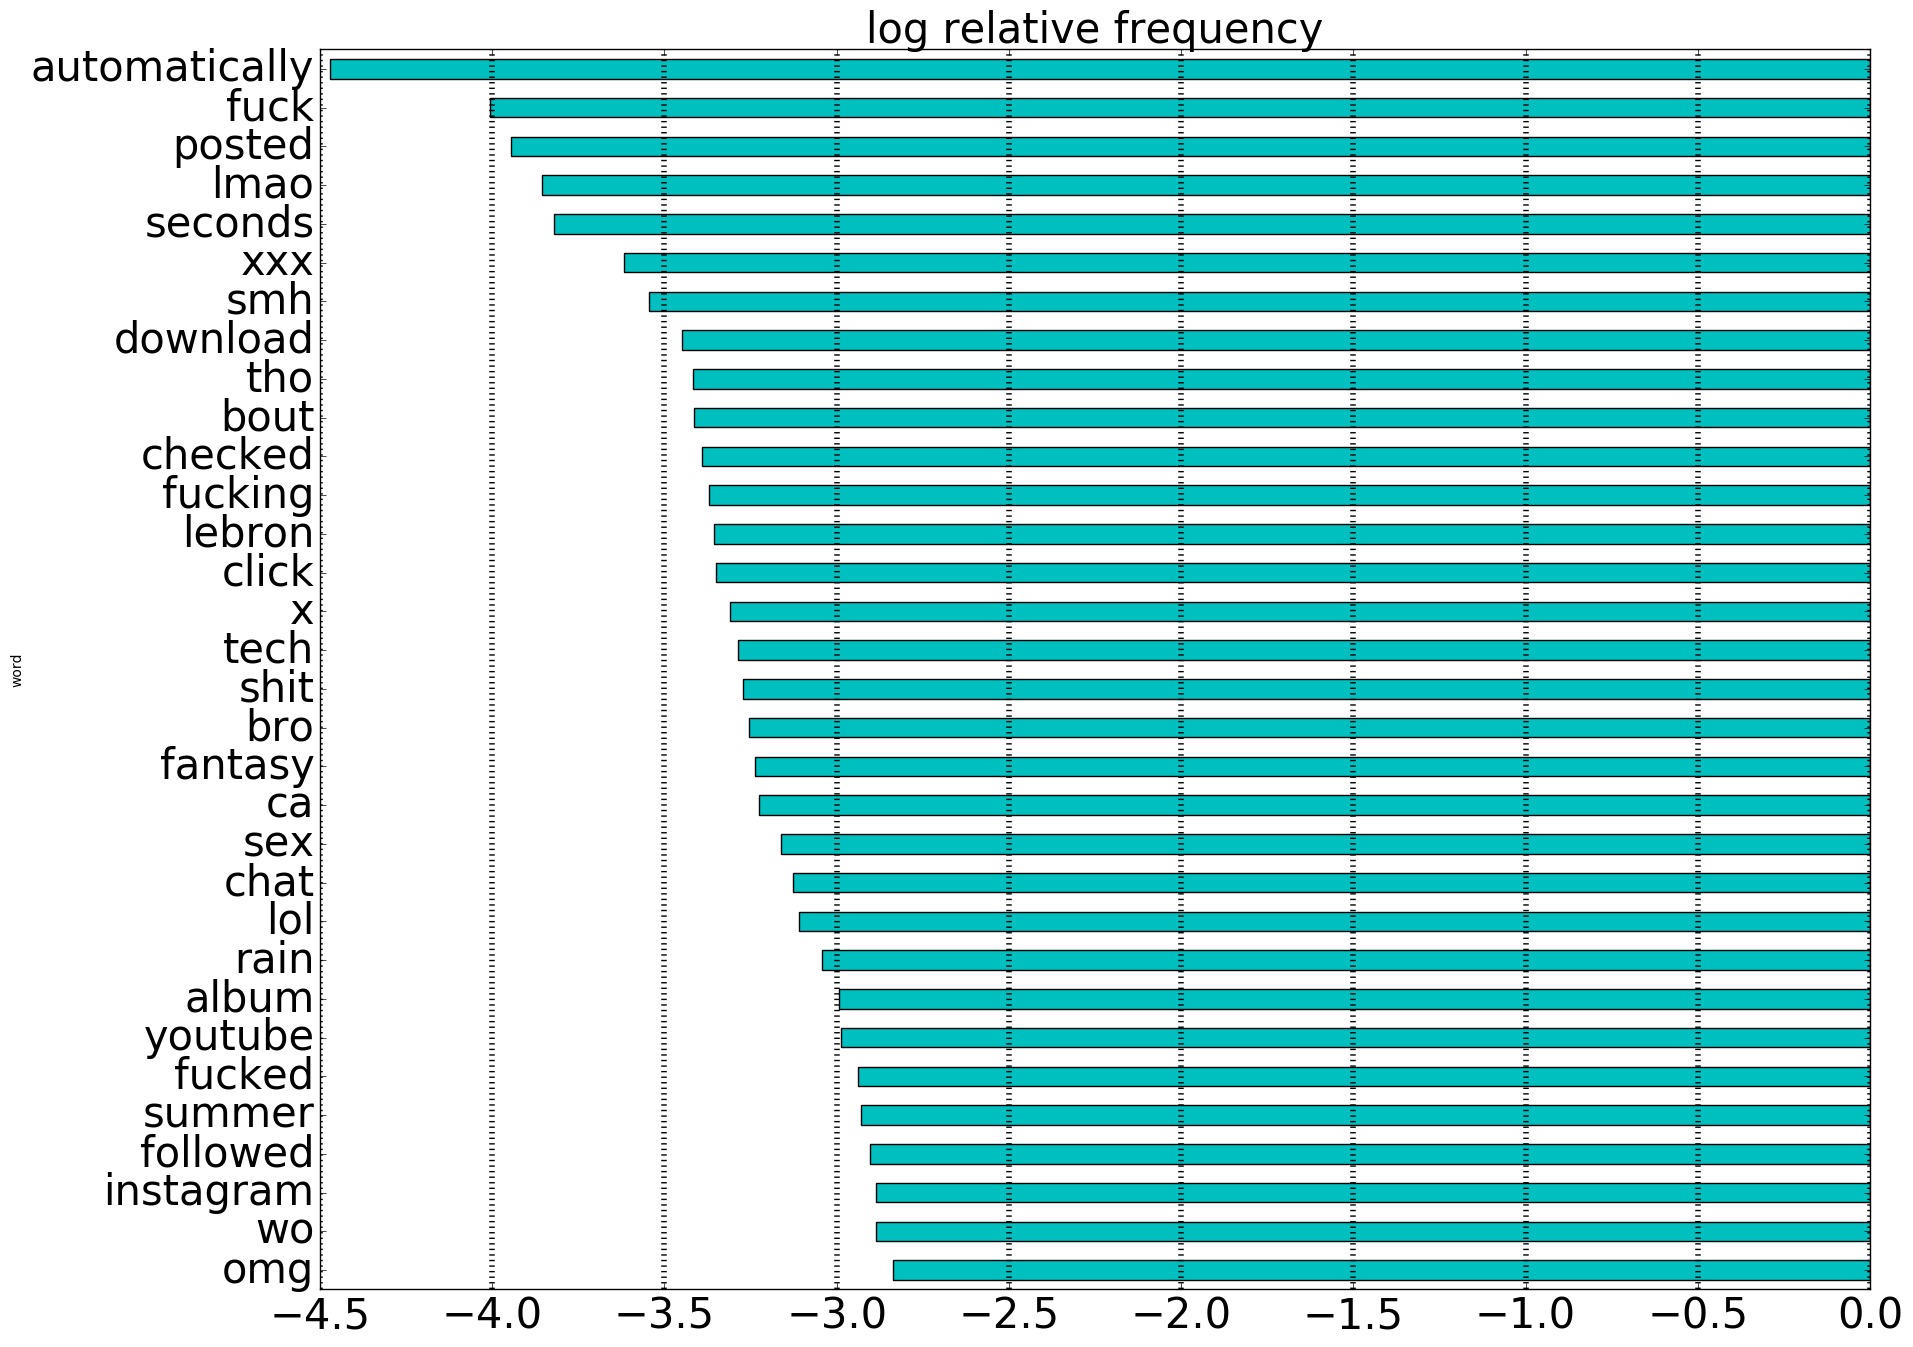

In [14]:
num_words_to_plot = 32
background_cutoff = 10000
twit.word_freq_df[twit.word_freq_df['background occurrences']>background_cutoff].sort_values("log relative frequency", ascending=False).set_index("word")["log relative frequency"][-num_words_to_plot:].plot.barh(figsize=(20,
                num_words_to_plot/2.), fontsize=30, color="c"); 
plt.title("log relative frequency", fontsize=30); 
ax = plt.axes();        
ax.xaxis.grid(linewidth=4);

Trump does not post about things happening automatically.

In [15]:
twit.tweets_containing("fuck")

21 tweets contain this term


,username,text
7259,NaN,benjaminabey realdonaldtrump mcuban dallasmavs so what the fuck is your problem the people love him nobody loves him
7850,NaN,ironman1021 i think after watching his roast ive realized that realdonaldtrump is super fucking bad ass props to you sir true thanks
8375,NaN,massergio realdonaldtrump the fucking truth we need our jobs back that wont happen without new leadership
9066,NaN,twittbecray realdonaldtrump go fuck yourself you dumb fuck when was the last time you had a datesuch terrible language picture
9147,NaN,itsjenwbitches people can hate on realdonaldtrump all they want but in reality hes flying his jet over your fucking house as you tweet
9877,NaN,jefepinal realdonaldtrump is a fucking genius true
9918,NaN,mishaforever realdonaldtrump mikedgarrison fuck yeah she should have to pay she said some really bad and stupid things
9985,NaN,mikomuhfucka realdonaldtrump doesnt show enough compassion to ever really be considered a presidential candidate i have great comp
13028,NaN,lloyd156 realdonaldtrump doesnt give a fuck he just tells it like it is lol legend a very honest person thanks
13879,NaN,realhollishicks so fucking sick of the middle east i agree with trump if were spending over there might as well take their oilrealhollishicks436241904083431424
